In [1]:
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Files\\flipkart_com-ecommerce_sample.csv')

In [3]:
df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >>

In [4]:
df.isnull().sum()
##df.info()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [5]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

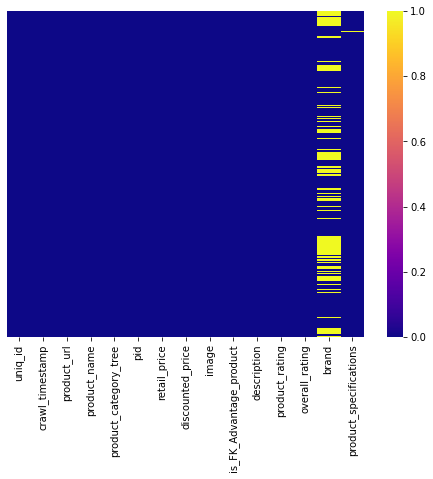

In [6]:
## brand column has lot of null values it can be shown by colormap
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), yticklabels=False, cmap='plasma', cbar=True);

In [7]:
## convering object column to datetime fo future use
df['crawl_timestamp']=pd.to_datetime(df['crawl_timestamp'])
df['date']=df['crawl_timestamp'].dt.date
df['year']=df['crawl_timestamp'].dt.year
df['month']=df['crawl_timestamp'].dt.month
df.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,date,year,month
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016-03-25,2016,3
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",2016-03-25,2016,3
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",2016-03-25,2016,3
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016-03-25,2016,3
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016-03-25,2016,3


In [8]:
##df[['main_category','primary_category', 'secondary_category','tirnaty_category']] = df.product_category_tree.str.split(expand=True)
   

In [9]:
##Separating product category tree to different level

In [10]:
df['main_category']=df['product_category_tree'].apply(lambda x :x.split('>>')[0][2:len(x.split('>>')[0])-1])

In [11]:
def primary_category(value):
    try:
        return value.split('>>')[1][1:len(value.split('>>')[1])-1]
    except IndexError:
        return 'None'       
def secondary_category(value):
    try:
        return value.split('>>')[2][1:len(value.split('>>')[2])-1]
    except IndexError:
        return 'None'
def tertiary_category(value):
    try:
        return value.split('>>')[3][1:len(value.split('>>')[3])-1]
    except IndexError:
        return 'None'

In [12]:
df['primary_category']=df['product_category_tree'].apply(primary_category)
df['secondary_category']=df['product_category_tree'].apply(secondary_category)
df['tertiary_category']=df['product_category_tree'].apply(tertiary_category)

In [13]:
df.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,overall_rating,brand,product_specifications,date,year,month,main_category,primary_category,secondary_category,tertiary_category
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016-03-25,2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,...,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",2016-03-25,2016,3,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,...,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",2016-03-25,2016,3,Footwear,Women's Footwear,Ballerinas,"AW Bellies"""
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,...,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016-03-25,2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,...,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016-03-25,2016,3,Pet Supplies,Grooming,Skin & Coat Care,Shampoo


In [14]:
df.drop('product_category_tree', axis=1, inplace=True)

In [15]:
df.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,...,overall_rating,brand,product_specifications,date,year,month,main_category,primary_category,secondary_category,tertiary_category
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,...,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016-03-25,2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,...,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",2016-03-25,2016,3,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,...,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",2016-03-25,2016,3,Footwear,Women's Footwear,Ballerinas,"AW Bellies"""
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,...,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016-03-25,2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,...,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016-03-25,2016,3,Pet Supplies,Grooming,Skin & Coat Care,Shampoo


In [16]:
## how many years of data
df.year.unique()

array([2016, 2015], dtype=int64)

In [17]:
## which year the sale is maximum
df.groupby('year').discounted_price.sum()

year
2015    12009320.0
2016    27304790.0
Name: discounted_price, dtype: float64

In [18]:
## each year on which month the sale is high
df.groupby(['year','month']).discounted_price.sum()

year  month
2015  12       12009320.0
2016  1        21498650.0
      2          264539.0
      3         2507724.0
      4         1391281.0
      5          704162.0
      6          938434.0
Name: discounted_price, dtype: float64

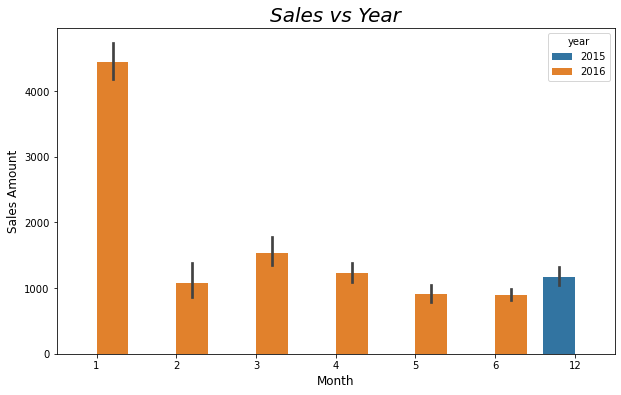

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x='month', y='discounted_price', data=df, hue='year')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)
plt.title('Sales vs Year', fontsize=20, fontstyle='italic');

In [20]:
## in which month of the year most orders are placed
df.month.value_counts()

12    10315
1      4850
3      1634
4      1137
6      1046
5       773
2       245
Name: month, dtype: int64

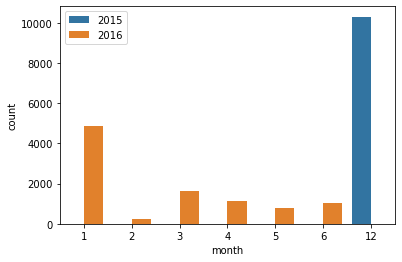

In [21]:
sns.countplot(x='month', hue='year', data=df)
plt.legend(loc=2)

In [22]:
## unique category
df.main_category.nunique()

266

In [23]:
## under which category most of the time product purchased by customer
df['main_category'].value_counts().sort_values(ascending=False)

Clothing                                                6198
Jewellery                                               3531
Footwear                                                1227
Mobiles & Accessories                                   1099
Automotive                                              1012
                                                        ... 
Bengal Blooms Rose Artificial Plant  with Pot (3..."       1
Pazel Slim Fit Men's Jeans"                                1
SMART TRADERS Girls Bellies"                               1
Eternal Gandhi Super Series Crystal Paper Weight..."       1
Areon Luxurious Fragrance Long Lasting Car,Home,..."       1
Name: main_category, Length: 266, dtype: int64

In [24]:
df['main_category'].value_counts()[:10].sort_values(ascending=False).index

Index(['Clothing', 'Jewellery', 'Footwear', 'Mobiles & Accessories',
       'Automotive', 'Home Decor & Festive Needs', 'Beauty and Personal Care',
       'Home Furnishing', 'Kitchen & Dining', 'Computers'],
      dtype='object')

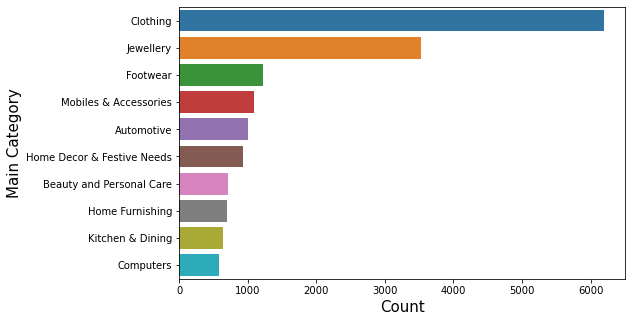

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(y='main_category', data=df,
              order=df['main_category'].value_counts()[:10].sort_values(ascending=False).index)
plt.ylabel('Main Category', fontsize=15)
plt.xlabel('Count', fontsize=15);

In [26]:
## which main category has more sales value
df.groupby('main_category').discounted_price.sum().sort_values(ascending=False)

main_category
Jewellery                                               19578167.0
Clothing                                                 4408329.0
Furniture                                                3080605.0
Home Decor & Festive Needs                               1701745.0
Watches                                                  1355850.0
                                                           ...    
Sisel Printed Poly Cotton Women's Stole"                     128.0
Siemens 5SL Betagard 5SL MCB (1)"                            120.0
INKT INKT A5 Wiro Notebook A5 Notebook Ring Boun..."           0.0
fourgee Slim Fit Boy's Black Jeans"                            0.0
Disney Printed Baby Boy's Hooded Grey T-Shirt"                 0.0
Name: discounted_price, Length: 266, dtype: float64

In [27]:
df.groupby('main_category').discounted_price.sum().sort_values(ascending=False)[:10].index

Index(['Jewellery', 'Clothing', 'Furniture', 'Home Decor & Festive Needs',
       'Watches', 'Footwear', 'Automotive', 'Computers',
       'Mobiles & Accessories', 'Home Furnishing'],
      dtype='object', name='main_category')

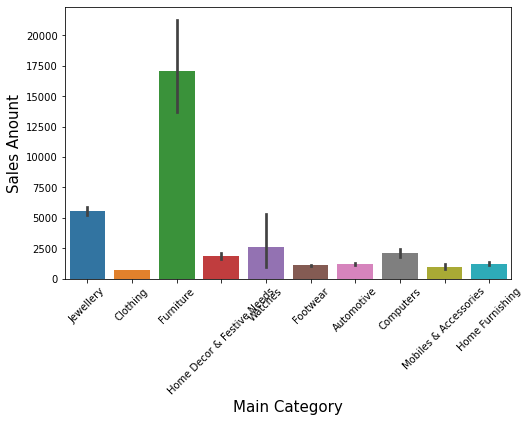

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(x='main_category', y='discounted_price', data=df,
              order=df.groupby('main_category').discounted_price.sum().sort_values(ascending=False)[:10].index)
plt.xlabel('Main Category', fontsize=15)
plt.ylabel('Sales Anount', fontsize=15)
plt.xticks(rotation=45);

In [29]:
##how many primary categories are there in each main category
df.primary_category.value_counts().sort_values(ascending=False)

Women's Clothing                 3901
Men's Clothing                   1773
Necklaces & Chains               1606
Accessories & Spare parts         925
Tablet Accessories                801
                                 ... 
Elligator Aviator Sunglasses"       1
sovam Home Furnishing               1
Strollers & Activity Gear           1
Naaz Toys & School Supplies         1
Home Utilities                      1
Name: primary_category, Length: 223, dtype: int64

In [31]:
df.primary_category.value_counts().sort_values(ascending=False)[:10].index

Index(['Women's Clothing', 'Men's Clothing', 'Necklaces & Chains',
       'Accessories & Spare parts', 'Tablet Accessories', 'Women's Footwear',
       'Bangles, Bracelets & Armlets', 'Rings"', 'Wrist Watches',
       'Kids' Clothing'],
      dtype='object')

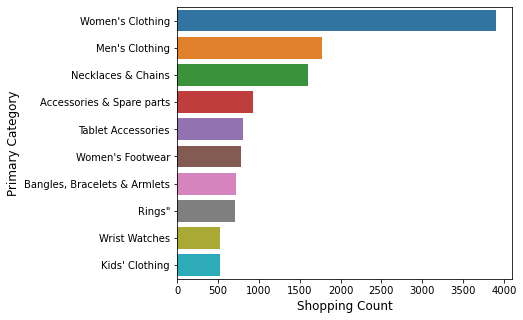

In [32]:
plt.figure(figsize=(6,5))
sns.countplot(y='primary_category', data=df,
              order=df.primary_category.value_counts().sort_values(ascending=False)[:10].index)
plt.ylabel('Primary Category', fontsize=12)
plt.xlabel('Shopping Count', fontsize=12);

In [33]:
## which primary category earning more
df.groupby('primary_category').discounted_price.sum().sort_values(ascending=False)

primary_category
Rings"                             17724243.0
Living Room                         2491621.0
Women's Clothing                    2325067.0
Men's Clothing                      1663213.0
Wrist Watches                       1352941.0
                                      ...    
Elligator Aviator Sunglasses"           219.0
Aligatorr Aviator Sunglasses"           180.0
Mikado Aviator Sunglasses"              179.0
Wind Spinner Toys                       129.0
Dark Image Wayfarer Sunglasses"         117.0
Name: discounted_price, Length: 223, dtype: float64

In [34]:
df.groupby('primary_category').discounted_price.sum().sort_values(ascending=False)[:10].index

Index(['Rings"', 'Living Room', 'Women's Clothing', 'Men's Clothing',
       'Wrist Watches', 'Accessories & Spare parts', 'Women's Footwear',
       'Tablet Accessories', 'Network Components',
       'Bangles, Bracelets & Armlets'],
      dtype='object', name='primary_category')

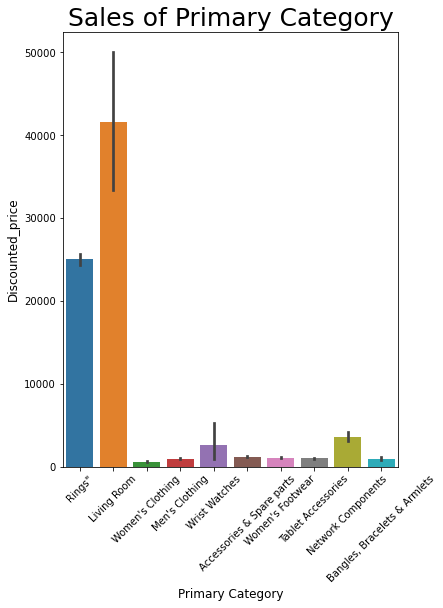

In [35]:
plt.figure(figsize=(6,8))
sns.barplot(x='primary_category', y='discounted_price', data=df,
              order=df.groupby('primary_category').discounted_price.sum().sort_values(ascending=False)[:10].index)
plt.xlabel('Primary Category', fontsize=12)
plt.ylabel('Discounted_price', fontsize=12)
plt.xticks(rotation=45)
plt.title('Sales of Primary Category', fontsize=25);

In [36]:
## which secondary category sold most
df.secondary_category.value_counts().sort_values(ascending=False)

Western Wear                                            1981
Necklaces"                                              1567
None                                                    1457
Lingerie, Sleep & Swimwear                              1208
T-Shirts                                                 903
                                                        ... 
Manirathnum Manirathnum Tourquise Original Gemst..."       1
Shoperite Office Supplies"                                 1
Timex Wrist Watches"                                       1
RKDEAL Ride Ons                                            1
Shaving Creams, Foams, and Gels                            1
Name: secondary_category, Length: 899, dtype: int64

In [37]:
df.secondary_category.value_counts().sort_values(ascending=False)[:10].index

Index(['Western Wear', 'Necklaces"', 'None', 'Lingerie, Sleep & Swimwear',
       'T-Shirts', 'Cases & Covers', 'Car Interior & Exterior', 'Ethnic Wear',
       'Casual Shoes', 'Bangles"'],
      dtype='object')

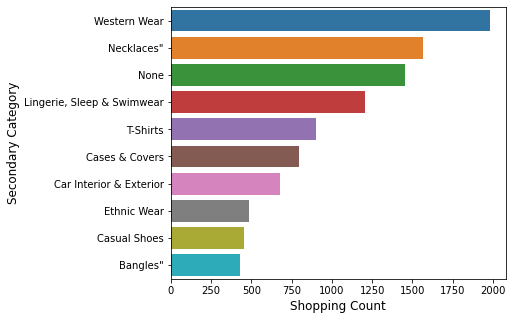

In [38]:
plt.figure(figsize=(6,5))
sns.countplot(y='secondary_category', data=df,
              order=df.secondary_category.value_counts().sort_values(ascending=False)[:10].index)
plt.ylabel('Secondary Category', fontsize=12)
plt.xlabel('Shopping Count', fontsize=12);

In [39]:
##which secondary category has more sell
df.groupby('secondary_category').discounted_price.sum().sort_values(ascending=False)

secondary_category
None                                18481425.0
Sofas & Sectionals"                  2486122.0
Western Wear                         1270978.0
Car Interior & Exterior               901118.0
Cases & Covers                        791467.0
                                       ...    
Bento Role Play Toys                     143.0
Supports                                 140.0
Yijun Wind Spinner Toys"                 129.0
Bento Musical Instruments & Toys         126.0
SIM Adapters                              99.0
Name: discounted_price, Length: 899, dtype: float64

In [40]:
df.groupby('secondary_category').discounted_price.sum().sort_values(ascending=False)[:10].index

Index(['None', 'Sofas & Sectionals"', 'Western Wear',
       'Car Interior & Exterior', 'Cases & Covers', 'Routers', 'Casual Shoes',
       'Necklaces"', 'Breitling Wrist Watches"', 'T-Shirts'],
      dtype='object', name='secondary_category')

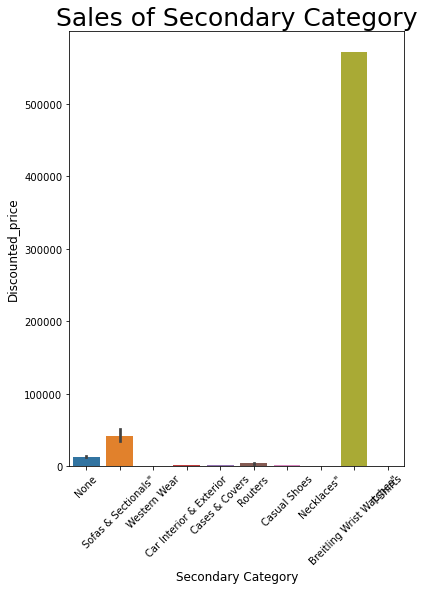

In [41]:
plt.figure(figsize=(6,8))
sns.barplot(x='secondary_category', y='discounted_price', data=df,
              order=df.groupby('secondary_category').discounted_price.sum().sort_values(ascending=False)[:10].index)
plt.xlabel('Secondary Category', fontsize=12)
plt.ylabel('Discounted_price', fontsize=12)
plt.xticks(rotation=45)
plt.title('Sales of Secondary Category', fontsize=25);

In [42]:
##which tertiary categories shopping count is more
df.tertiary_category.value_counts().sort_values(ascending=False)

None                                                    5876
Shirts, Tops & Tunics                                   1249
Bras                                                    1036
Car Interior                                             659
Dresses & Skirts                                         620
                                                        ... 
Space Women Heels"                                         1
Ts4U Casual Shoes"                                         1
Lowe Alpine Rucksack Raincover Raincover M Lugga..."       1
Seastar Casual Shoes"                                      1
Fun To See Stickers"                                       1
Name: tertiary_category, Length: 2371, dtype: int64

In [43]:
df.tertiary_category.value_counts().sort_values(ascending=False)[:10].index

Index(['None', 'Shirts, Tops & Tunics', 'Bras', 'Car Interior',
       'Dresses & Skirts', 'Combos', 'Plant Containers & Sets',
       'TheLostPuppy Cases & Covers"', 'Leggings & Jeggings',
       'Kurtas & Kurtis'],
      dtype='object')

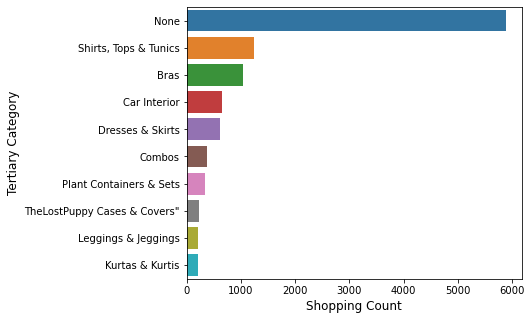

In [44]:
plt.figure(figsize=(6,5))
sns.countplot(y='tertiary_category', data=df,
              order=df.tertiary_category.value_counts().sort_values(ascending=False)[:10].index)
plt.ylabel('Tertiary Category', fontsize=12)
plt.xlabel('Shopping Count', fontsize=12);

In [45]:
##which tertiary category has more sell
df.groupby('tertiary_category').discounted_price.sum().sort_values(ascending=False)

tertiary_category
None                           25416619.0
Car Interior                     889508.0
Shirts, Tops & Tunics            730648.0
Dresses & Skirts                 546129.0
GAGA Paintings                   370060.0
                                  ...    
Satzuma USB Gadgets"                  0.0
Eurospa Baby Bath Towels              0.0
Big Balaji Bulbs"                     0.0
Rock Polo Backpacks"                  0.0
Pearstone Battery chargers"           0.0
Name: discounted_price, Length: 2371, dtype: float64

In [46]:
df.groupby('tertiary_category').discounted_price.sum().sort_values(ascending=False)[:10].index

Index(['None', 'Car Interior', 'Shirts, Tops & Tunics', 'Dresses & Skirts',
       'GAGA Paintings', 'Bras', 'Plant Containers & Sets', 'Religious Idols',
       'DailyObjects Cases & Covers"', 'Boots"'],
      dtype='object', name='tertiary_category')

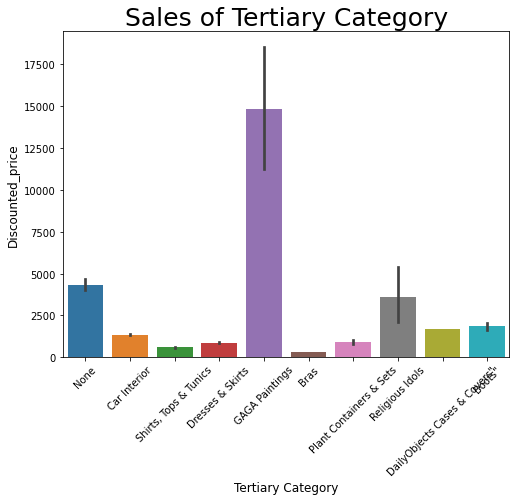

In [47]:
plt.figure(figsize=(8,6))
sns.barplot(x='tertiary_category', y='discounted_price', data=df,
              order=df.groupby('tertiary_category').discounted_price.sum().sort_values(ascending=False)[:10].index)
plt.xlabel('Tertiary Category', fontsize=12)
plt.ylabel('Discounted_price', fontsize=12)
plt.xticks(rotation=45)
plt.title('Sales of Tertiary Category', fontsize=25);

In [48]:
##Adding a discount amount column
df.insert(7, 'discount_amount', df['retail_price']-df['discounted_price'])

In [49]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,discount_amount,image,is_FK_Advantage_product,...,overall_rating,brand,product_specifications,date,year,month,main_category,primary_category,secondary_category,tertiary_category
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,SRTEH2FF9KEDEFGF,999.0,379.0,620.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016-03-25,2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,SBEEH3QGU7MFYJFY,32157.0,22646.0,9511.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,...,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",2016-03-25,2016,3,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,SHOEH4GRSUBJGZXE,999.0,499.0,500.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,...,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",2016-03-25,2016,3,Footwear,Women's Footwear,Ballerinas,"AW Bellies"""
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,SRTEH2F6HUZMQ6SJ,699.0,267.0,432.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,...,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016-03-25,2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,PSOEH3ZYDMSYARJ5,220.0,210.0,10.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,...,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016-03-25,2016,3,Pet Supplies,Grooming,Skin & Coat Care,Shampoo


In [50]:
df.rename({'discounted_price':'selling_price'}, axis=1, inplace=True)

In [51]:
pd.options.display.max_columns=40
df.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,selling_price,discount_amount,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,date,year,month,main_category,primary_category,secondary_category,tertiary_category
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,SRTEH2FF9KEDEFGF,999.0,379.0,620.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016-03-25,2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,SBEEH3QGU7MFYJFY,32157.0,22646.0,9511.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",2016-03-25,2016,3,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,SHOEH4GRSUBJGZXE,999.0,499.0,500.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",2016-03-25,2016,3,Footwear,Women's Footwear,Ballerinas,"AW Bellies"""
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,SRTEH2F6HUZMQ6SJ,699.0,267.0,432.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016-03-25,2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,PSOEH3ZYDMSYARJ5,220.0,210.0,10.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016-03-25,2016,3,Pet Supplies,Grooming,Skin & Coat Care,Shampoo


In [52]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name', 'pid',
       'retail_price', 'selling_price', 'discount_amount', 'image',
       'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications', 'date', 'year',
       'month', 'main_category', 'primary_category', 'secondary_category',
       'tertiary_category'],
      dtype='object')

In [54]:
df.drop(['uniq_id','crawl_timestamp','product_url','pid','image','is_FK_Advantage_product','description','product_rating','overall_rating','product_specifications'], axis=1, inplace=True)

In [55]:
df.head(5)

,product_name,retail_price,selling_price,discount_amount,brand,date,year,month,main_category,primary_category,secondary_category,tertiary_category
0,Alisha Solid Women's Cycling Shorts,999.0,379.0,620.0,Alisha,2016-03-25,2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
1,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,9511.0,FabHomeDecor,2016-03-25,2016,3,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,AW Bellies,999.0,499.0,500.0,AW,2016-03-25,2016,3,Footwear,Women's Footwear,Ballerinas,"AW Bellies"""
3,Alisha Solid Women's Cycling Shorts,699.0,267.0,432.0,Alisha,2016-03-25,2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
4,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,10.0,Sicons,2016-03-25,2016,3,Pet Supplies,Grooming,Skin & Coat Care,Shampoo


In [57]:
## which main category has highest retail price
df.groupby('main_category').retail_price.max().sort_values(ascending=False)[:10]

main_category
Watches                       571230.0
Furniture                     250500.0
Mobiles & Accessories         116292.0
Pens & Stationery              71687.0
Clothing                       69999.0
Jewellery                      49999.0
Home Decor & Festive Needs     47620.0
Automotive                     44880.0
Computers                      38890.0
Kitchen & Dining               34168.0
Name: retail_price, dtype: float64

In [64]:
## which category has given maximum discount
df.groupby('main_category').discount_amount.max().sort_values(ascending=False)[:10]

main_category
Furniture                     87675.0
Pens & Stationery             26883.0
Jewellery                     25419.0
Automotive                    22440.0
Clothing                      21000.0
Home Decor & Festive Needs    20990.0
Beauty and Personal Care      19425.0
Computers                     11610.0
Bags, Wallets & Belts         10109.0
Footwear                       9998.0
Name: discount_amount, dtype: float64

In [62]:
## which primary category has maximum retail price
df.groupby('primary_category').retail_price.max().sort_values(ascending=False)[:10]

primary_category
Wrist Watches                   571230.0
Living Room                     250500.0
Mobile Accessories              116292.0
Office Equipments                71687.0
Men's Clothing                   69999.0
Bangles, Bracelets & Armlets     49999.0
Rings"                           49999.0
Table Decor & Handicrafts        47620.0
Wall Decor & Clocks              46500.0
Bedroom Furniture                45864.0
Name: retail_price, dtype: float64

In [63]:
## which primary category gave maximum discount
df.groupby('primary_category').discount_amount.max().sort_values(ascending=False)[:10]

primary_category
Living Room                     87675.0
Office Equipments               26883.0
Bangles, Bracelets & Armlets    25419.0
Accessories & Spare parts       22440.0
Men's Clothing                  21000.0
Wall Decor & Clocks             20990.0
Makeup                          19425.0
Rings"                          17779.0
Bedroom Furniture               15000.0
Women's Clothing                14997.0
Name: discount_amount, dtype: float64

In [67]:
## which secondary category has maximum retail price
df.groupby('secondary_category').retail_price.max().sort_values(ascending=False)[:10]

secondary_category
Breitling Wrist Watches"    571230.0
Sofas & Sectionals"         250500.0
Cartier Wrist Watches"      201000.0
Headphones                  116292.0
TAG Heuer Wrist Watches"    107750.0
Biometric Devices            71687.0
Winter & Seasonal Wear       69999.0
None                         49999.0
Bracelets"                   49999.0
Showpieces                   47620.0
Name: retail_price, dtype: float64

In [65]:
## which secondary category gave maximum discount
df.groupby('secondary_category').discount_amount.max().sort_values(ascending=False)[:10]

secondary_category
Sofas & Sectionals"       87675.0
Biometric Devices         26883.0
Bracelets"                25419.0
Car & Bike Care           22440.0
Winter & Seasonal Wear    21000.0
Paintings                 20990.0
Vanity Boxes              19425.0
None                      17779.0
Beds                      15000.0
Ethnic Wear               14997.0
Name: discount_amount, dtype: float64

In [68]:
## which tertiary category has maximum retail price
df.groupby('tertiary_category').retail_price.max().sort_values(ascending=False)[:10]

tertiary_category
None                                                    571230.0
Audeze Headphones                                       116292.0
NITGEN Biometric Devices                                 71687.0
Jackets                                                  69999.0
Religious Idols                                          47620.0
GAGA Paintings                                           46500.0
Springwel Single Spring Mattress (1981.199999999..."     45864.0
Car & Bike Covers                                        44880.0
Ethnic Handicrafts Solid Wood Queen Bed (Finish ..."     39999.0
Lehenga Cholis                                           39992.0
Name: retail_price, dtype: float64

In [66]:
## which tertiary category gave maximum discount
df.groupby('tertiary_category').discount_amount.max().sort_values(ascending=False)[:10]

tertiary_category
None                                                    87675.0
NITGEN Biometric Devices                                26883.0
Car & Bike Covers                                       22440.0
Jackets                                                 21000.0
GAGA Paintings                                          20990.0
Soulful Threads Vanity Boxes                            19425.0
Ethnic Handicrafts Solid Wood Queen Bed (Finish ..."    15000.0
Lehenga Cholis                                          14997.0
Ethnic Handicrafts Solid Wood Single Bed (Finish..."    12000.0
Fabric                                                  11955.0
Name: discount_amount, dtype: float64

In [70]:
## which brand has more sells 
df.groupby('brand').selling_price.sum().sort_values(ascending=False)[:10]

brand
Karatcraft         5632898.0
Radiant Bay        3601945.0
BlueStone          2796709.0
Durian             1480125.0
ARRA                973097.0
Rakam               774110.0
Jewels5             713743.0
Fullcutdiamond      675287.0
Allure Auto         663819.0
Shashvat Jewels     544387.0
Name: selling_price, dtype: float64

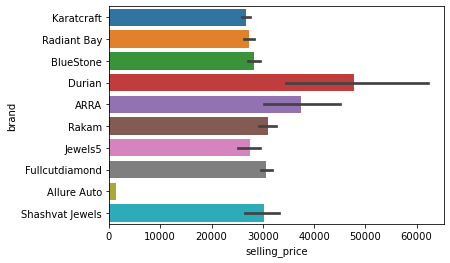

In [73]:
sns.barplot(y='brand', x='selling_price', data=df,
            order=df.groupby('brand').selling_price.sum().sort_values(ascending=False)[:10].index);

In [74]:
## which product has maximum selling price
df.groupby('product_name').selling_price.max().sort_values(ascending=False)[:10]

product_name
Breitling AB011010/BB08 131S Chronomat 44 Analog Watch  - For Boys, Men     571230.0
Cartier W6701005 Analog Watch  - For Boys, Men                              201000.0
Durian Leather 2 Seater Sofa                                                162825.0
Durian Laze/3 Leather 3 Seater Sofa                                         141375.0
Audeze Lcd2 In Bamboo, High Quality Planar Magnetic Headphone Headphones    116292.0
TAG Heuer CAU1116.BA0858 Formula 1 Analog Watch  - For Boys, Men            107750.0
Durian Club/3 Leather 3 Seater Sofa                                         105300.0
ARRA Solid Wood 7 Seater Sofa                                                86500.0
Durian Helena Fabric 3 Seater Sofa                                           70785.0
Durian Dream/2 Leather 2 Seater Sofa                                         70200.0
Name: selling_price, dtype: float64

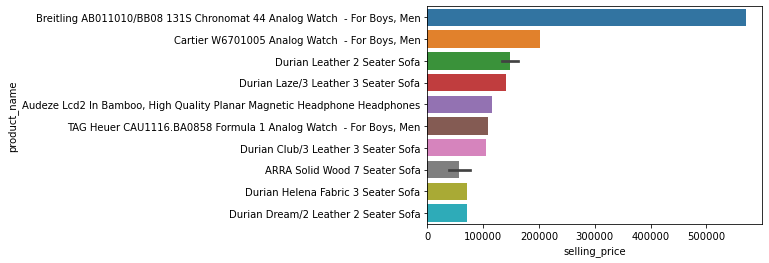

In [77]:
sns.barplot(y='product_name', x='selling_price', data=df,
            order=df.groupby('product_name').selling_price.max().sort_values(ascending=False)[:10].index);

In [79]:
## which product has min selling price
df.groupby('product_name').selling_price.min().sort_values()[:10]

product_name
Geol Wooden Wet and Dry Broom                           35.0
Havells Havells - Oro 32 One Way Electrical Switch      36.0
Smartcraft Generic Netted Art Cloth Pencil Box          41.0
Sam Rolling Pizza Cutter                                45.0
Khanna Jupiter Board & Art Paper Box File               47.0
Smartcraft Angry Birds Cartoons Art Metal Pencil Box    48.0
Smartcraft Generic Pendant Art Cloth Pencil Box         48.0
Maped Twist and Flex Transparent Rubber Rulers          49.0
Dhiyaa Traders Manchester united Key Chain              54.0
Dhiyaa Traders Mario Key Chain                          54.0
Name: selling_price, dtype: float64

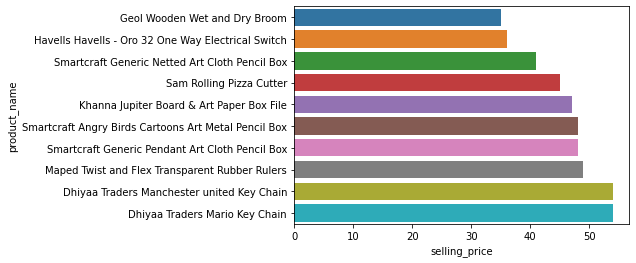

In [81]:
sns.barplot(y='product_name', x='selling_price', data=df,
            order=df.groupby('product_name').selling_price.min().sort_values()[:10].index);

In [82]:
df.head(2)

,product_name,retail_price,selling_price,discount_amount,brand,date,year,month,main_category,primary_category,secondary_category,tertiary_category
0,Alisha Solid Women's Cycling Shorts,999.0,379.0,620.0,Alisha,2016-03-25,2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
1,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,9511.0,FabHomeDecor,2016-03-25,2016,3,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...


In [84]:
## adding discount percentage column
df.insert(4, 'discount_percentage', (df['discount_amount']/df['retail_price'])*100)

In [85]:
df

,product_name,retail_price,selling_price,discount_amount,discount_percentage,brand,date,year,month,main_category,primary_category,secondary_category,tertiary_category
0,Alisha Solid Women's Cycling Shorts,999.0,379.0,620.0,62.062062,Alisha,2016-03-25,2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
1,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,9511.0,29.576764,FabHomeDecor,2016-03-25,2016,3,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,AW Bellies,999.0,499.0,500.0,50.050050,AW,2016-03-25,2016,3,Footwear,Women's Footwear,Ballerinas,"AW Bellies"""
3,Alisha Solid Women's Cycling Shorts,699.0,267.0,432.0,61.802575,Alisha,2016-03-25,2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
4,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,10.0,4.545455,Sicons,2016-03-25,2016,3,Pet Supplies,Grooming,Skin & Coat Care,Shampoo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,WallDesign Small Vinyl Sticker,1500.0,730.0,770.0,51.333333,WallDesign,2015-12-01,2015,12,Baby Care,Baby & Kids Gifts,Stickers,"WallDesign Stickers"""
19996,Wallmantra Large Vinyl Stickers Sticker,1429.0,1143.0,286.0,20.013996,Wallmantra,2015-12-01,2015,12,Baby Care,Baby & Kids Gifts,Stickers,"Wallmantra Stickers"""
19997,Elite Collection Medium Acrylic Sticker,1299.0,999.0,300.0,23.094688,Elite Collection,2015-12-01,2015,12,Baby Care,Baby & Kids Gifts,Stickers,"Elite Collection Stickers"""
19998,Elite Collection Medium Acrylic Sticker,1499.0,1199.0,300.0,20.013342,Elite Collection,2015-12-01,2015,12,Baby Care,Baby & Kids Gifts,Stickers,"Elite Collection Stickers"""


In [87]:
## which product giving maximumm discount
df.groupby('product_name').discount_percentage.max().sort_values(ascending=False)[:10]

product_name
Rajcrafts Floral Double Quilts & Comforters White                 96.533333
FashBlush Forever New Orange Bead & Chain Alloy Necklace          95.273818
FashBlush Forever Beautiful White Bead Alloy Necklace             94.598457
Bling Book Case for iPad 2 / 3                                    94.548458
FashBlush Forever New BlackBead & LongChain Alloy Necklace        94.418884
Fashblush Alloy Choker                                            93.576350
FashBlush Forever New BlackBead Alloy Necklace                    93.364455
Fash Blush Forever New Gold & White Pearl Chunk Alloy Necklace    93.364455
Mydress Mystyle Bulb Led USB Led Light                            92.492492
Fash Blush Forever New Red & Gold Tribal Thread Alloy Necklace    92.076831
Name: discount_percentage, dtype: float64

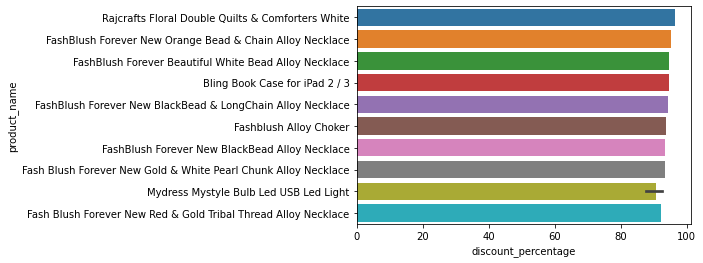

In [88]:
sns.barplot(x='discount_percentage', y='product_name', data=df,
            order=df.groupby('product_name').discount_percentage.max().sort_values(ascending=False)[:10].index);

In [89]:
## which product giving minimum dicount percentage
df.groupby('product_name').discount_percentage.min().sort_values(ascending=True)[:10]

product_name
Jazma E11A835LA Casual Analog Watch  - For Men                        0.0
Maxima 20141CMGI Attivo Analog Watch  - For Men                       0.0
Riva Carpets Cotton Free Bath Mat Classic Loop Shag Bathmat_RI-527    0.0
Riva Carpets Cotton Free Bath Mat Classic Shag Bathmat-RI-04          0.0
Maxima 20020LMGI Attivo Analog Watch  - For Men                       0.0
Bajaj Majesty Grill Ultra Open Grill                                  0.0
Maxima 19883BMLI Swarovski Analog Watch  - For Women                  0.0
Fab Nisa Self Design Women's Straight Kurta                           0.0
Fab Nisa Solid Women's Straight Kurta                                 0.0
Baggit Pouch Potli                                                    0.0
Name: discount_percentage, dtype: float64